In [ ]:
#zad1 Да се напише функция divided_difference(nodes, values), където nodes 
#е списък с точки от реалната права, а values -- списък с реални стойности. 
#Функцията да изчислява разделената разлика на функция със стойности values 
#в точките nodes.


In [3]:
def divided_difference(nodes, values):
    length = len(nodes)
    if length == 1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:]) - divided_difference(nodes[:length-1], values[:length-1])) / (nodes[length-1] - nodes[0])     


nodes = [0, 1, 4]
values = [2, 5, 48]
divided_difference(nodes, values)

2.8333333333333335

In [ ]:
#zad2 Да се напише функция newton_poly(nodes, values, x), която връща 
#интерполационния полином на Лагранж, с възли nodes и съответни стойности 
#values.

In [26]:
from sympy import Symbol
import numpy as np
x = Symbol('x')

def divided_difference(nodes, values):
    length = len(nodes)
    if length == 1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:]) - divided_difference(nodes[:length-1], values[:length-1])) / (nodes[length-1] - nodes[0])     

def get_multi(nodes, _x):
    length = len(nodes)
    result = 1
    for i in range(0,length):
        result *= _x - nodes[i]
    return result    

def newton_poly(nodes, values, _x):
    length = len(nodes)
    sum = values[0] 
    for i in range(1,length):
        sum += divided_difference(nodes[:i+1], values[:i+1]) * get_multi(nodes[:i], _x)
    return sum   

nodes = np.array([0, 1, 4])
values = np.array([2, 5, 48])

result_poly = newton_poly(nodes, values, x)
print(result_poly)

2.83333333333333*x*(x - 1) + 3.0*x + 2


In [ ]:
#zad3 В таблицата са дадени данни за населението на САЩ в периода 1920-1990. 
#Да се построи полином от седма степен, интерполиращ таблицата. Да се даде 
#приближение на населението през 1952, 1974, 2000 година и да се сравни с 
#действителните стойности -- съответно 157 млн., 214 млн., 281.42 млн.
#Година	    1920	1930	1940	1950	1960	1970	1980	1990
#Население	106.46	123.08	132.12	152.27	180.67	205.05	227.23	249.46

In [27]:
import numpy as np
from sympy import Symbol
x = Symbol('x')

years = np.array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990])
population_in_millions = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])

def divided_difference(nodes, values):
    length = len(nodes)
    if length == 1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:]) - divided_difference(nodes[:length-1], values[:length-1])) / (nodes[length-1] - nodes[0])     

def get_multi(nodes, _x):
    length = len(nodes)
    result = 1
    for i in range(0,length):
        result *= _x - nodes[i]
    return result    

def newton_poly(nodes, values, _x):
    length = len(nodes)
    sum = values[0] 
    for i in range(1,length):
        sum += divided_difference(nodes[:i+1], values[:i+1]) * get_multi(nodes[:i], _x)
    return sum  

print(newton_poly(years, population_in_millions, x))
print(newton_poly(years, population_in_millions, 1952))
print(newton_poly(years, population_in_millions, 1974))
print(newton_poly(years, population_in_millions, 2000))

1.662*x - 9.62698412698392e-10*(x - 1980)*(x - 1970)*(x - 1960)*(x - 1950)*(x - 1940)*(x - 1930)*(x - 1920) + 1.57777777777772e-8*(x - 1970)*(x - 1960)*(x - 1950)*(x - 1940)*(x - 1930)*(x - 1920) + 1.01166666666668e-6*(x - 1960)*(x - 1950)*(x - 1940)*(x - 1930)*(x - 1920) - 8.97916666666668e-5*(x - 1950)*(x - 1940)*(x - 1930)*(x - 1920) + 0.003115*(x - 1940)*(x - 1930)*(x - 1920) - 0.0379*(x - 1930)*(x - 1920) - 3084.58
157.72802626559996
213.51053127680007
175.08000000000226


In [ ]:
# екстра полация = извън границите на възлите
#затова в 2000г. е толкова неправилна апроксимацията

In [ ]:
#zad4 Дадена е функцията на Рунге  f = 1 / (1 + 25* x^2). Да се приближи f в 
#интервала x∈[−1,1], като се използват интерполационни полиноми от степени 10 
#и 4 с равноотдалечени възли. Да се построят графиките на всеки от полиномите,
#заедно с графиката на функцията в една координатна система, както и графиките
#на абсолютната грешка по модул в двата случая.

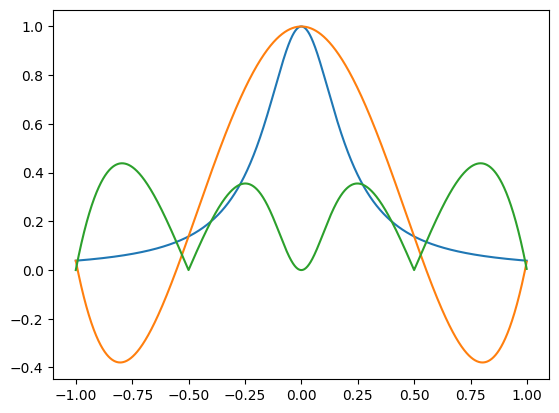

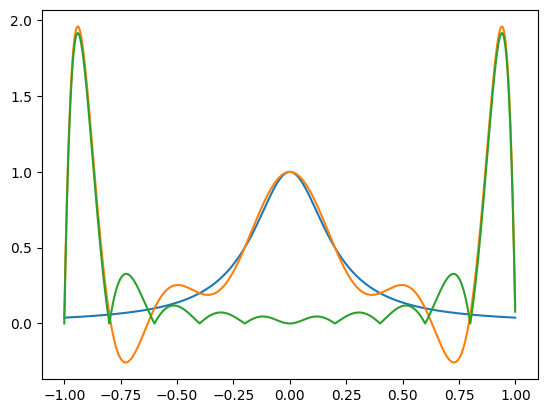

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def divided_difference(nodes, values):
    length = len(nodes)
    if length == 1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:]) - divided_difference(nodes[:length-1], values[:length-1])) / (nodes[length-1] - nodes[0])     

def get_multi(nodes, _x):
    length = len(nodes)
    result = 1
    for i in range(0,length):
        result *= _x - nodes[i]
    return result    

def newton_poly(nodes, values, _x):
    length = len(nodes)
    sum = values[0] 
    for i in range(1,length):
        sum += divided_difference(nodes[:i+1], values[:i+1]) * get_multi(nodes[:i], _x)
    return sum  

def abs_mistake(func1, func2, x):
    return abs(func1(x) - func2(x))
    
def runge_func(x):
    return 1 / (1 + 25*x**2)

x4 = np.linspace(-1, 1, 5)
y4 = runge_func(x4)
x=np.arange(-1, 1 ,0.001)

def poly4(x):
    return newton_poly(x4, y4, x)
    
plt.plot(x ,runge_func(x))
plt.plot(x, poly4(x))
plt.plot(x, abs_mistake(runge_func, poly4, x))
plt.show()

x10 = np.linspace(-1, 1, 11)
y10 = runge_func(x10)

def poly10(x):
    return newton_poly(x10, y10, x)
    
plt.plot(x ,runge_func(x))
plt.plot(x, poly10(x))
plt.plot(x, abs_mistake(runge_func, poly10, x))
plt.show()

In [ ]:
#не винаги е добра апорксимация да ползваме равноотдалечени възли
#противно на очкаванията, не винаги когато увеличим степента полинома става по-точен
#ако ползваме възли около средата минимизираме максималната грешка

In [ ]:
#zad5 Известно е (вж. лекции), че най-добрите възли за интерполация в 
#интервала  [−1,1]  са т.нар. Чебишови възли, които се задават по формулата:
#ξk=cos(π(2k−1)/2n),k=1,…,n Да се построи интерполационен полином от 10-та степен
#за функцията на Рунге, като за целта се използват съответните Чебишови възли
#в интервала [−1,1]. Да се построи графика на абсолютната грешка.

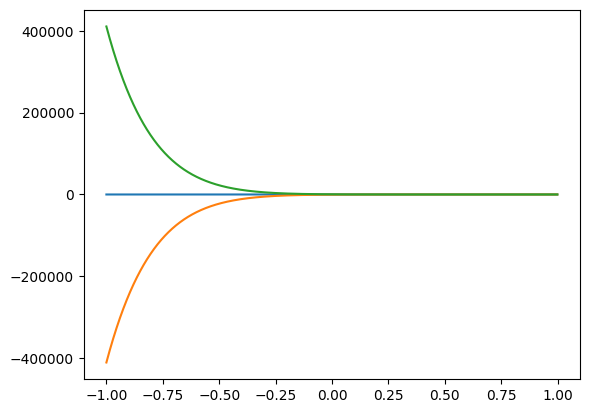

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def divided_difference(nodes, values):
    length = len(nodes)
    if length == 1:
        return values[0]
    return (divided_difference(nodes[1:], values[1:]) - divided_difference(nodes[:-1], values[:-1])) / (nodes[-1] - nodes[0])     

def get_multi(nodes, _x):
    length = len(nodes)
    result = 1
    for i in range(0,length):
        result *= _x - nodes[i]
    return result    

def newton_poly(nodes, values, _x):
    length = len(nodes)
    sum = values[0] 
    for i in range(1,length):
        sum += divided_difference(nodes[:i+1], values[:i+1]) * get_multi(nodes[:i], _x)
    return sum  

def abs_mistake(func1, func2, x):
    return abs(func1(x) - func2(x))
    
def runge_func(x):
    return 1 / (1 + 25*x**2)
    
x10 = []
y10 = []
n = 11
for i in range(n):
        noode = np.cos((2*(i + 1) - 1)/ 2*n*np.pi
        x10.append(noode)
        y10.append(runge_func(x10[i]))
    
x=np.arange(-1, 1 ,0.001)

def poly10(x):
    return newton_poly(x10, y10, x)

plt.plot(x, runge_func(x))
plt.plot(x, poly10(x))
plt.plot(x, abs_mistake(runge_func, poly10, x))
plt.show()